In [91]:
# importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [92]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
data_cleaned = df.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Combining 'Date' and 'Time' into a single datetime column
data_cleaned["Datetime"] = pd.to_datetime(
    data_cleaned["Date"] + " " + data_cleaned["Time"], 
    format="%d/%m/%Y %H.%M.%S", 
    errors="coerce"
)

# Droping the original 'Date' and 'Time' columns
data_cleaned = data_cleaned.drop(columns=["Date", "Time"])

# Replacing placeholder values (-200) with NaN
data_cleaned = data_cleaned.replace(-200, pd.NA)

# Converting numeric columns to proper types (if not already numeric)
for col in data_cleaned.columns:
    if col not in ['Datetime']:
        data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')


# Replacing missing values for numeric columns with their mean
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

# Verifing the cleaned dataset
print("Cleaned Dataset Info:")
print(data_cleaned.info())
# Printing the first 5 rows
print(data_cleaned.head())

data_cleaned.describe()



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9471 non-null   float64       
 1   PT08.S1(CO)    9471 non-null   float64       
 2   NMHC(GT)       9471 non-null   float64       
 3   C6H6(GT)       9471 non-null   float64       
 4   PT08.S2(NMHC)  9471 non-null   float64       
 5   NOx(GT)        9471 non-null   float64       
 6   PT08.S3(NOx)   9471 non-null   float64       
 7   NO2(GT)        9471 non-null   float64       
 8   PT08.S4(NO2)   9471 non-null   float64       
 9   PT08.S5(O3)    9471 non-null   float64       
 10  T              9471 non-null   float64       
 11  RH             9471 non-null   float64       
 12  AH             9471 non-null   float64       
 13  Datetime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
count,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9357
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,2004-09-21 16:00:00
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00
25%,1.200000,943.000000,218.811816,4.600000,744.000000,113.000000,667.000000,86.000000,1246.000000,744.500000,12.100000,36.700000,0.750100,2004-06-16 05:00:00
50%,2.152750,1078.000000,218.811816,8.700000,927.000000,232.000000,821.000000,113.091251,1456.264598,990.000000,18.317829,49.234201,1.020300,2004-09-21 16:00:00
75%,2.600000,1218.000000,218.811816,13.500000,1102.000000,281.500000,957.000000,132.000000,1658.000000,1250.000000,24.000000,61.700000,1.291500,2004-12-28 03:00:00
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,1.308123,211.506999,63.484629,7.258562,259.981136,192.258871,250.224117,43.655793,337.318719,388.254107,8.605371,16.872320,0.393446,NaN


In [93]:
# selecting the Target anf feature variables
x_ln = data_cleaned[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y_ln = data_cleaned['CO(GT)']

# Splitting the data into training and testing
x_train_ln, x_test_ln, y_train_ln, y_test_ln = train_test_split(x_ln, y_ln, test_size=0.2, random_state=22)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_ln)
X_test_scaled = scaler.transform(x_test_ln)

# Training the model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_ln)

# Prediction of the model
y_pred_ln = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test_ln, y_pred_ln)
r2 = r2_score(y_test_ln, y_pred_ln)

print(y_pred_ln)
print(mse)
print(r2)





[2.15179018 0.95259053 1.9474351  ... 2.81875634 4.46874035 1.51836983]
0.6595307319533897
0.6510689195821173


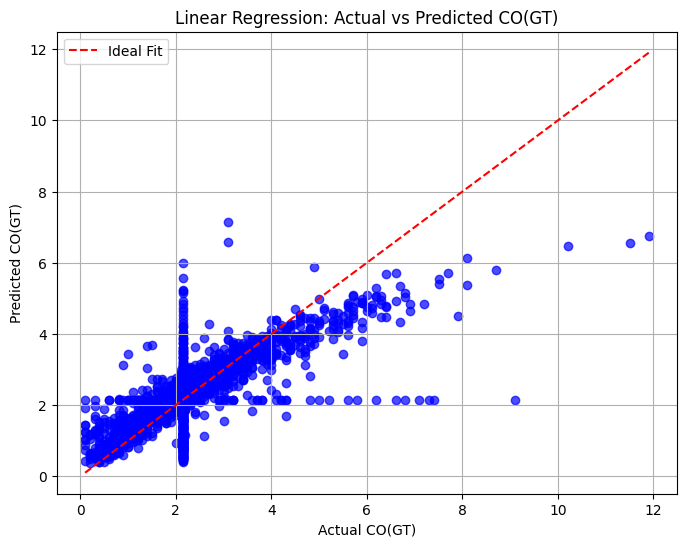

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_ln, y_pred_ln, alpha=0.7, color="blue")
plt.plot([min(y_test_ln), max(y_test_ln)], [min(y_test_ln), max(y_test_ln)], color="red", linestyle="--", label="Ideal Fit")
plt.title("Linear Regression: Actual vs Predicted CO(GT)")
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.legend()
plt.grid(True)
plt.show()

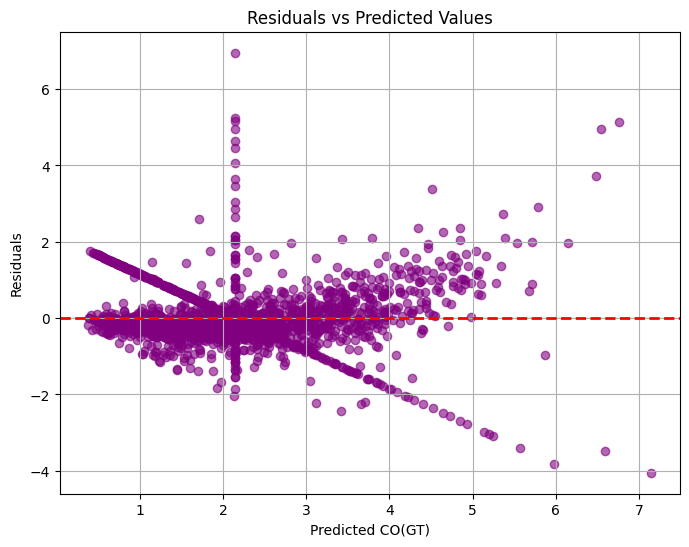

In [95]:
# Residual Analysis: Actual - Predicted
residuals = y_test_ln - y_pred_ln

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ln, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.xlabel("Predicted CO(GT)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid()
plt.show()

In [99]:
# Defining the binary target: High CO (1) vs Low CO (0)
threshold_co = 2.5  # CO(GT) threshold in mg/m³
data_cleaned['High_CO'] = (data_cleaned['CO(GT)'] > threshold_co).astype(int)

x_log = data_cleaned[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y_log = data_cleaned['High_CO']

x_train_log, x_test_log, y_train_log , y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state= 22, stratify=y_log)

# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_log)
X_test_scaled = scaler.transform(x_test_log)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000,class_weight='balanced')
log_reg.fit(X_train_scaled, y_train_log)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test_log, y_pred)
conf_matrix = confusion_matrix(y_test_log, y_pred)
report = classification_report(y_test_log, y_pred)
roc_auc = roc_auc_score(y_test_log, log_reg.predict_proba(X_test_scaled)[:, 1])

print(accuracy)

print(conf_matrix)
print("\nClassification Report:")
print(report)


0.8828496042216358
[[1249  167]
 [  55  424]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1416
           1       0.72      0.89      0.79       479

    accuracy                           0.88      1895
   macro avg       0.84      0.88      0.86      1895
weighted avg       0.90      0.88      0.89      1895



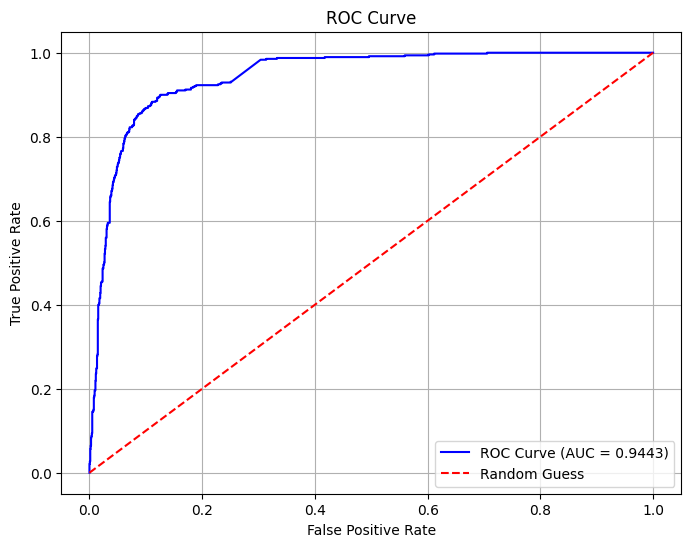

In [100]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_log, log_reg.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

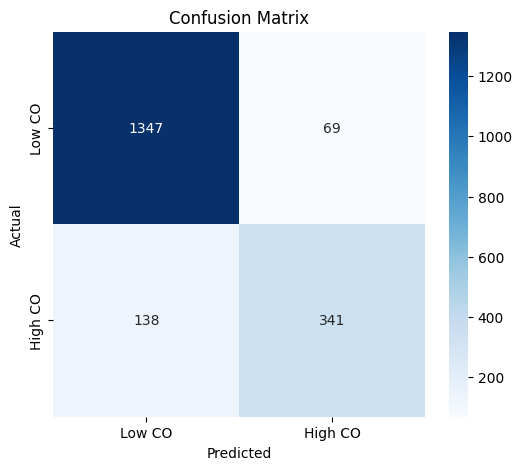

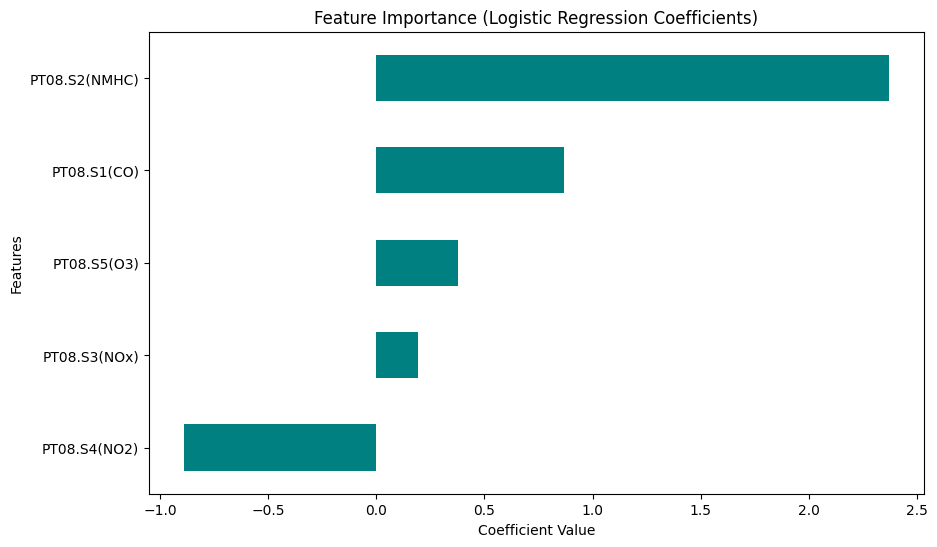

In [98]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low CO", "High CO"], yticklabels=["Low CO", "High CO"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Feature Importance
coefficients = pd.Series(log_reg.coef_[0], index=['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])
coefficients = coefficients.sort_values()

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()